This data analysis project looks at data from the Austin Animal Center from 2013 to February 17, 2025. A no-kill animal shelter in Austin, Texas that services the city and the surrounded unincorporated county.

# **Data importation, cleaning, and wrangling.**

the Python version used in this project is 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]

 the Pandas version used in this project is 2.2.2

 the Numpy version used in this project is 1.26.4



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#'Animal_Type' and 'Animal ID' converted to category to save memory.
shelter = pd.read_csv('Austin_Animal_Center_Outcomes.csv', dtype={'Animal Type': 'category', 'Animal ID': 'category'})
#columns using time and dates converted to datetime. After viewing the data may drop irrelevant date columns
shelter['DateTime'] = pd.to_datetime(shelter['DateTime'], errors='coerce')
shelter['Date of Birth'] = pd.to_datetime(shelter['Date of Birth'], errors='coerce')
shelter['MonthYear'] = pd.to_datetime(shelter['MonthYear'], errors='coerce')

<ipython-input-2-f1c412d41edc>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  shelter['DateTime'] = pd.to_datetime(shelter['DateTime'], errors='coerce')
<ipython-input-2-f1c412d41edc>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  shelter['MonthYear'] = pd.to_datetime(shelter['MonthYear'], errors='coerce')


In [3]:
shelter.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A882831,*Hamilton,2023-07-01 18:12:00,2023-07-01,2023-03-25,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,2019-05-08 18:20:00,2019-05-01,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,2018-07-18 16:02:00,2018-07-01,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
3,A821648,NaN,2020-08-16 11:38:00,2020-08-01,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
4,A720371,Moose,2016-02-13 17:59:00,2016-02-01,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff


In [4]:
#Changing formatting of column names
shelter.columns = shelter.columns.str.lower().str.replace(' ', '_')
shelter = shelter.rename(columns={'datetime': 'date_time'})

# **Data Cleaning**


In [5]:
shelter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171580 entries, 0 to 171579
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   animal_id         171580 non-null  category      
 1   name              122472 non-null  object        
 2   date_time         171580 non-null  datetime64[ns]
 3   monthyear         171580 non-null  datetime64[ns]
 4   date_of_birth     171580 non-null  datetime64[ns]
 5   outcome_type      171538 non-null  object        
 6   outcome_subtype   78634 non-null   object        
 7   animal_type       171580 non-null  category      
 8   sex_upon_outcome  171578 non-null  object        
 9   age_upon_outcome  171574 non-null  object        
 10  breed             171580 non-null  object        
 11  color             171580 non-null  object        
dtypes: category(2), datetime64[ns](3), object(7)
memory usage: 19.1+ MB


In [6]:
#checking for duplicate rows
shelter.duplicated().sum()

24

In [7]:
#dropping duplicates
shelter = shelter.drop_duplicates()

In [8]:
#getting rid of any potential blank spaces
shelter.loc[:,'animal_id'] = shelter.loc[:,'animal_id'].str.strip()

In [9]:
#Some animal names are missing. Changing from 'NaN' to "Unknown" and removing extra characters such as seen with *Hamilton
shelter['name'] = shelter.loc[:,'name'].fillna('Unknown').str.strip('!@#$%^&*() ')


In [10]:
#appears datetime and monthyear are the same. Investigated below
shelter.head()

,animal_id,name,date_time,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,A882831,Hamilton,2023-07-01 18:12:00,2023-07-01,2023-03-25,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,2019-05-08 18:20:00,2019-05-01,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,2018-07-18 16:02:00,2018-07-01,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
3,A821648,Unknown,2020-08-16 11:38:00,2020-08-01,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
4,A720371,Moose,2016-02-13 17:59:00,2016-02-01,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff


In [11]:
datetime_year= shelter['date_time'].dt.year
monthyear_year = shelter['monthyear'].dt.year
datetime_year.equals(monthyear_year)

True

In [12]:
datetime_mon= shelter['date_time'].dt.month
monthyear_mon = shelter['monthyear'].dt.month
datetime_mon.equals(monthyear_mon)

True

Since the columns DateTime and MonthYear are repeatitve, MonthYear will be dropped due to having slightly less information to offer. Also, due to the substantial amount of missing values in Outcome_Subtype, this column will be dropped as well.

In [13]:
shelter = shelter.drop(columns=['outcome_subtype','monthyear'])

In [14]:
shelter.head()

,animal_id,name,date_time,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,A882831,Hamilton,2023-07-01 18:12:00,2023-03-25,Adoption,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,2019-05-08 18:20:00,2017-05-02,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,2018-07-18 16:02:00,2017-07-12,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
3,A821648,Unknown,2020-08-16 11:38:00,2019-08-16,Euthanasia,Other,Unknown,1 year,Raccoon,Gray
4,A720371,Moose,2016-02-13 17:59:00,2015-10-08,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff


In [15]:
#date_of_birth has no missing values.
#checking outcome_type for missing or unclean data
print(shelter['outcome_type'].unique())
print('------')
print(shelter['outcome_type'].isna().sum())

['Adoption' 'Rto-Adopt' 'Euthanasia' 'Transfer' 'Return to Owner' 'Died'
 'Disposal' 'Missing' nan 'Relocate' 'Stolen' 'Lost']
------
42


In [16]:

f' Missing data in this section represents {(42 / 171556) *100} of total data.'

' Missing data in this section represents 0.02448180186061694 of total data.'

In [17]:
shelter['outcome_type'].value_counts(normalize=True) *100

,proportion
outcome_type,
Adoption,48.603029
Transfer,28.074676
Return to Owner,14.862927
Euthanasia,6.206490
Died,0.960855
Rto-Adopt,0.713061
Disposal,0.504915
Missing,0.053640
Relocate,0.016325


In [18]:
#to preserve some of the metrics that will be anaylsed the missing data will be convered to adoptions
#Changing 'Rto-Adopt' to 'Foster Care' for clarity. according to the animal center this is what 'Rto-Adapt' mean.
shelter['outcome_type'] = shelter.loc[:,'outcome_type'].replace({'Rto-Adopt': 'Foster Care', np.nan : 'Adoption'})

In [19]:
print(shelter['animal_type'].unique())
print('------')
print(shelter['animal_type'].isna().sum())

['Cat', 'Dog', 'Other', 'Bird', 'Livestock']
Categories (5, object): ['Bird', 'Cat', 'Dog', 'Livestock', 'Other']
------
0


In [20]:
print(shelter['sex_upon_outcome'].unique())
print('------')
print(shelter['sex_upon_outcome'].isna().sum())

['Neutered Male' 'Unknown' 'Intact Male' 'Spayed Female' 'Intact Female'
 nan]
------
2


In [21]:
#missing values for 'sex_upon_outcome' replaced with 'Unknown'
shelter['sex_upon_outcome'] = shelter.loc[:,'sex_upon_outcome'].fillna('Unknown')

In [22]:
shelter.head()

,animal_id,name,date_time,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,A882831,Hamilton,2023-07-01 18:12:00,2023-03-25,Adoption,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,2019-05-08 18:20:00,2017-05-02,Foster Care,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,2018-07-18 16:02:00,2017-07-12,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
3,A821648,Unknown,2020-08-16 11:38:00,2019-08-16,Euthanasia,Other,Unknown,1 year,Raccoon,Gray
4,A720371,Moose,2016-02-13 17:59:00,2015-10-08,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff


#### **Data Wrangling / Cleaning Continued**
*'age_upon_outcome' column*

Next the 'age_upon_outcome' column will be cleaned and wrangled to ehnance usability. It will not format to datetime and this column has several issues. These issues such as negative number and information that is not very helpful such as "0 years." I will format in days for highest level of precision and then deal with any oddity in data.

In [23]:
shelter['age_upon_outcome'].unique()

array(['3 months', '2 years', '1 year', '4 months', '6 days', '7 years',
       '2 months', '3 years', '2 days', '3 weeks', '11 years', '9 months',
       '4 weeks', '2 weeks', '6 months', '9 years', '10 years', '1 month',
       '8 years', '7 months', '6 years', '4 years', '12 years', '5 years',
       '1 day', '1 weeks', '5 months', '5 days', '15 years', '10 months',
       '4 days', '16 years', '8 months', '13 years', '1 week', '14 years',
       '11 months', '3 days', '0 years', '5 weeks', '17 years',
       '18 years', '20 years', '22 years', '-2 years', '19 years',
       '28 years', '-3 years', '23 years', nan, '25 years', '30 years',
       '-1 years', '24 years', '21 years', '-4 years'], dtype=object)

In [24]:
shelter['age_upon_outcome'].isnull().sum()

6

I will split 'age_upon_outcome' into two columns for temporary use. I will standardize the age into day and years to maximize percision and readability.

In [25]:
#Will make NaN's '0' so that I can change the type of the data in this column from object to str.
#Will later fill in zeros with average of column
shelter['age_upon_outcome'] = shelter['age_upon_outcome'].fillna(0)

In [26]:
#create new columns
shelter[['num', 'time_unit']] = shelter['age_upon_outcome'].astype(str).str.split(' ', expand=True)

In [27]:
#convert object type data to intergers for 'num' and str for 'time_unit'
shelter['num'] = shelter['num'].astype(int)

In [28]:
#I'm using np.select() to convert data to days. abs() used to deal with negative intergers
#to_datetime method malfunctions with this data after trying np.select() will keep new columns as ints and floats.
conditions = [
    shelter['time_unit'] == 'day',
    shelter['time_unit'] == 'days',
    shelter['time_unit'] == 'week',
    shelter['time_unit'] == 'weeks',
    shelter['time_unit'] == 'month',
    shelter['time_unit'] == 'months',
    shelter['time_unit'] == 'year',
    shelter['time_unit'] ==  'years',
    ]

operations = [
    abs(shelter['num'] * 1),
    abs(shelter['num'] * 1),
    abs(shelter['num'] * 7),
    abs(shelter['num'] * 7),
    abs(shelter['num'] * 30),
    abs(shelter['num'] * 30),
    abs(shelter['num'] * 365),
    abs(shelter['num'] * 365),
    ]

shelter['age_upon_outcome_days'] = np.select(conditions, operations, default=0)

In [29]:
#take missing values found earlier and convert from zero to the average for this column
shelter['age_upon_outcome_days'] = shelter['age_upon_outcome_days'].replace(0, shelter['age_upon_outcome_days'].mean())

In [30]:
# add column outcome in years
shelter['outcome_age_by_years'] = shelter['age_upon_outcome_days'].apply(lambda x: x / 365)

In [31]:
#checking work
shelter.head()

,animal_id,name,date_time,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,num,time_unit,age_upon_outcome_days,outcome_age_by_years
0,A882831,Hamilton,2023-07-01 18:12:00,2023-03-25,Adoption,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White,3,months,90.0,0.246575
1,A794011,Chunk,2019-05-08 18:20:00,2017-05-02,Foster Care,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,years,730.0,2.000000
2,A776359,Gizmo,2018-07-18 16:02:00,2017-07-12,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,year,365.0,1.000000
3,A821648,Unknown,2020-08-16 11:38:00,2019-08-16,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,1,year,365.0,1.000000
4,A720371,Moose,2016-02-13 17:59:00,2015-10-08,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,months,120.0,0.328767


In [32]:
#int days and round years
shelter['age_upon_outcome_days'] = shelter['age_upon_outcome_days'].astype(int)
shelter['outcome_age_by_years'] = shelter['outcome_age_by_years'].round(2)

In [33]:
#drop columns that are now unnecessary
shelter = shelter.drop(columns=['age_upon_outcome', 'num', 'time_unit'])

In [34]:
#reorder 'age_upon_outcome_days' column for better readability
column_days_to_move = shelter.pop('age_upon_outcome_days')
column_years_to_move = shelter.pop('outcome_age_by_years')
shelter.insert(6,'age_upon_outcome_days', column_days_to_move)
shelter.insert(7,'age_upon_outcome_years', column_years_to_move)

In [35]:
shelter.head()

,animal_id,name,date_time,date_of_birth,outcome_type,animal_type,age_upon_outcome_days,age_upon_outcome_years,sex_upon_outcome,breed,color
0,A882831,Hamilton,2023-07-01 18:12:00,2023-03-25,Adoption,Cat,90,0.25,Neutered Male,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,2019-05-08 18:20:00,2017-05-02,Foster Care,Cat,730,2.00,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,2018-07-18 16:02:00,2017-07-12,Adoption,Dog,365,1.00,Neutered Male,Chihuahua Shorthair Mix,White/Brown
3,A821648,Unknown,2020-08-16 11:38:00,2019-08-16,Euthanasia,Other,365,1.00,Unknown,Raccoon,Gray
4,A720371,Moose,2016-02-13 17:59:00,2015-10-08,Adoption,Dog,120,0.33,Neutered Male,Anatol Shepherd/Labrador Retriever,Buff


In [36]:
print(shelter['breed'].unique())
print('------')
print(shelter['breed'].isna().sum())

['Domestic Shorthair Mix' 'Chihuahua Shorthair Mix' 'Raccoon' ...
 'Bull Terrier/Bulldog' 'English Cocker Spaniel/Pembroke Welsh Corgi'
 'Samoyed/Siberian Husky']
------
0


In [37]:
#Will leave column as is mostly is for now. Some values could be condensed or split into multple columns in the future for machine learning
for i in shelter['breed'].unique():
  print(i)

Domestic Shorthair Mix
Chihuahua Shorthair Mix
Raccoon
Anatol Shepherd/Labrador Retriever
American Foxhound/Labrador Retriever
Domestic Shorthair
Border Collie/Cardigan Welsh Corgi
Domestic Medium Hair
Pit Bull
Labrador Retriever Mix
Domestic Medium Hair Mix
Black Mouth Cur Mix
Siamese Mix
Opossum
Weimaraner/Labrador Retriever
Domestic Shorthair/Oriental Sh
Yorkshire Terrier Mix
Jack Russell Terrier/Chihuahua Shorthair
Great Pyrenees Mix
Bat Mix
Chihuahua Shorthair
Australian Cattle Dog Mix
Beagle Mix
Labrador Retriever/Staffordshire
Pit Bull Mix
German Shepherd Mix
Dogo Argentino Mix
Bat
Cairn Terrier Mix
Border Collie Mix
Collie Rough Mix
Rat Terrier
Polish
Rat Terrier/Cardigan Welsh Corgi
Doberman Pinsch
Australian Cattle Dog
American Bulldog
American Staffordshire Terrier Mix
Labrador Retriever
Miniature Poodle Mix
Dachshund/Chihuahua Shorthair
Bloodhound Mix
Standard Schnauzer/Miniature Poodle
Pug Mix
American Pit Bull Terrier Mix
Siberian Husky
Jack Russell Terrier Mix
Australian

In [38]:
# Using boolean indexing to select rows containing 'Mix' in 'breed' column.
# Then apply the replace method to those specific rows.
shelter.loc[shelter['breed'].str.contains('Mix'), 'breed'] = shelter.loc[shelter['breed'].str.contains('Mix'), 'breed'].str.replace('Mix', '')

In [39]:
for i in shelter['breed'].unique():
  print(i)

Domestic Shorthair 
Chihuahua Shorthair 
Raccoon
Anatol Shepherd/Labrador Retriever
American Foxhound/Labrador Retriever
Domestic Shorthair
Border Collie/Cardigan Welsh Corgi
Domestic Medium Hair
Pit Bull
Labrador Retriever 
Domestic Medium Hair 
Black Mouth Cur 
Siamese 
Opossum
Weimaraner/Labrador Retriever
Domestic Shorthair/Oriental Sh
Yorkshire Terrier 
Jack Russell Terrier/Chihuahua Shorthair
Great Pyrenees 
Bat 
Chihuahua Shorthair
Australian Cattle Dog 
Beagle 
Labrador Retriever/Staffordshire
Pit Bull 
German Shepherd 
Dogo Argentino 
Bat
Cairn Terrier 
Border Collie 
Collie Rough 
Rat Terrier
Polish
Rat Terrier/Cardigan Welsh Corgi
Doberman Pinsch
Australian Cattle Dog
American Bulldog
American Staffordshire Terrier 
Labrador Retriever
Miniature Poodle 
Dachshund/Chihuahua Shorthair
Bloodhound 
Standard Schnauzer/Miniature Poodle
Pug 
American Pit Bull Terrier 
Siberian Husky
Jack Russell Terrier 
Australian Kelpie 
Yorkshire Terrier/Miniature Poodle
Miniature Schnauzer 
Mini

In [40]:
#Will leave column as is for now. Some values could be condensed or split into multple columns in the future for machine learning

print(shelter['color'].unique())
print('------')
print(shelter['color'].isna().sum())

['Black/White' 'Brown Tabby/White' 'White/Brown' 'Gray' 'Buff'
 'Orange Tabby' 'Brown' 'Blue Tabby' 'Brown Tabby' 'Black'
 'White/Orange Tabby' 'Blue/White' 'White/Blue' 'Red/White' 'Black/Gray'
 'Torbie' 'Brown/Black' 'Lilac Point' 'Blue' 'Calico' 'Tricolor'
 'White/Tan' 'Chocolate' 'White' 'Brown/White' 'Brown Brindle/White'
 'Black/Brown' 'Tan/White' 'Chocolate/White' 'Red' 'Black/Tan'
 'White/White' 'Cream Tabby' 'Blue Tick/Black' 'White/Black' 'Fawn/Tan'
 'Gray/Black' 'Tortie' 'Tan' 'White/Blue Tabby' 'Sable/Tan'
 'Brown Brindle' 'Brown/Brown' 'Tan/Brown' 'Cream/Brown' 'Gray/White'
 'Brown/Gray' 'Blue Tabby/White' 'Orange Tabby/White' 'Blue Merle'
 'Brown Merle/White' 'Silver' 'Apricot' 'Apricot/Brown' 'Green'
 'Tortie Point' 'Tan/Black' 'Seal Point' 'Torbie/Brown Tabby'
 'Lynx Point/White' 'Fawn/White' 'Blue Tick' 'Tricolor/White' 'White/Gray'
 'Black/Tricolor' 'Chocolate/Tan' 'White/Brown Tabby'
 'White/Brown Brindle' 'Lynx Point' 'White/Buff' 'Cream' 'Blue/Tan'
 'Black Brindle/

In [41]:
#view DF's updated info / check for any remaining NaN's
shelter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171556 entries, 0 to 171579
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   animal_id               171556 non-null  category      
 1   name                    171556 non-null  object        
 2   date_time               171556 non-null  datetime64[ns]
 3   date_of_birth           171556 non-null  datetime64[ns]
 4   outcome_type            171556 non-null  object        
 5   animal_type             171556 non-null  category      
 6   age_upon_outcome_days   171556 non-null  int64         
 7   age_upon_outcome_years  171556 non-null  float64       
 8   sex_upon_outcome        171556 non-null  object        
 9   breed                   171556 non-null  object        
 10  color                   171556 non-null  object        
dtypes: category(2), datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 19.1+ MB


In [42]:
cleaned_shelter = shelter.reset_index()

**Exploratory Analysis**

In this section of the project the data from all the years listed in the data will be examined.



In [43]:
cleaned_shelter.head()

,index,animal_id,name,date_time,date_of_birth,outcome_type,animal_type,age_upon_outcome_days,age_upon_outcome_years,sex_upon_outcome,breed,color
0,0,A882831,Hamilton,2023-07-01 18:12:00,2023-03-25,Adoption,Cat,90,0.25,Neutered Male,Domestic Shorthair,Black/White
1,1,A794011,Chunk,2019-05-08 18:20:00,2017-05-02,Foster Care,Cat,730,2.00,Neutered Male,Domestic Shorthair,Brown Tabby/White
2,2,A776359,Gizmo,2018-07-18 16:02:00,2017-07-12,Adoption,Dog,365,1.00,Neutered Male,Chihuahua Shorthair,White/Brown
3,3,A821648,Unknown,2020-08-16 11:38:00,2019-08-16,Euthanasia,Other,365,1.00,Unknown,Raccoon,Gray
4,4,A720371,Moose,2016-02-13 17:59:00,2015-10-08,Adoption,Dog,120,0.33,Neutered Male,Anatol Shepherd/Labrador Retriever,Buff


In [44]:
cleaned_shelter.describe()

,index,date_time,date_of_birth,age_upon_outcome_days,age_upon_outcome_years
count,171556.000000,171556,171556,171556.000000,171556.000000
mean,85790.895603,2018-10-30 07:36:19.572151296,2016-09-27 04:45:26.293454848,724.719689,1.985167
min,0.000000,2013-10-01 09:31:00,1991-09-22 00:00:00,1.000000,0.000000
25%,42897.750000,2016-01-28 12:18:00,2014-03-08 00:00:00,60.000000,0.160000
50%,85790.500000,2018-07-16 15:35:00,2016-10-15 00:00:00,365.000000,1.000000
75%,128685.250000,2021-07-16 14:23:30,2019-10-24 00:00:00,730.000000,2.000000
max,171579.000000,2025-02-18 14:27:00,2025-02-06 00:00:00,10950.000000,30.000000
std,49530.700698,NaN,NaN,1022.357156,2.801214


Type and number of animals that have been in the shelter over the span of the data


In [45]:
cleaned_shelter['animal_type'].value_counts()

,count
animal_type,
Dog,93429
Cat,68410
Other,8815
Bird,868
Livestock,34


Top 5 outcomes for the animals

In [46]:
cleaned_shelter['outcome_type'].value_counts().nlargest(5)

,count
outcome_type,
Adoption,83403
Transfer,48152
Return to Owner,25492
Euthanasia,10645
Died,1648


Count and average age of animal upon outcome


In [47]:

cleaned_shelter.pivot_table(values='age_upon_outcome_years', index='outcome_type', columns='animal_type', aggfunc=['count'], observed=False, margins=True)

count                                      
animal_type      Bird    Cat    Dog Livestock Other     All
outcome_type                                               
Adoption          323  35250  46830        17   983   83403
Died               33    989    396         1   229    1648
Disposal           33    163     95         0   575     866
Euthanasia        151   2506   2181         2  5805   10645
Foster Care         0    248    972         0     3    1223
Lost                1      0      1         0     0       2
Missing             1     51     35         0     5      92
Relocate           10      6      1         0    11      28
Return to Owner    57   2824  22533         6    72   25492
Stolen              0      0      5         0     0       5
Transfer          259  26373  20380         8  1132   48152
All               868  68410  93429        34  8815  171556

In [48]:
cleaned_shelter.pivot_table(values=['age_upon_outcome_years'], index='outcome_type', columns='animal_type', aggfunc=['mean'], observed=False, margins=True)

mean                                \
                age_upon_outcome_years                                 
animal_type                       Bird       Cat       Dog Livestock   
outcome_type                                                           
Adoption                      1.387399  1.120361  1.906739  1.209412   
Died                          1.119091  1.198534  2.544823  0.040000   
Disposal                      1.084848  1.895092  2.452632       NaN   
Euthanasia                    1.396490  3.160331  4.450220  0.285000   
Foster Care                        NaN  3.434718  3.178117       NaN   
Lost                          2.000000       NaN  0.250000       NaN   
Missing                       1.000000  1.066078  1.842571       NaN   
Relocate                      2.531000  3.875000  4.000000       NaN   
Return to Owner               1.414561  4.117224  3.899191  1.205000   
Stolen                             NaN       NaN  4.364000       NaN   
Transfer                      1.636873  1.128467  2.197752  1.758750   
All                           1.456935  1.333494  2.526727  1.249118   

                                     
                                     
animal_type         Other       All  
outcome_type                         
Adoption         1.288739  1.564942  
Died             1.126157  1.509684  
Disposal         1.304487  1.533233  
Euthanasia       1.394624  2.436163  
Foster Care      2.000000  3.227261  
Lost                  NaN  1.125000  
Missing          0.346000  1.321630  
Relocate         0.820909  2.199643  
Return to Owner  3.057083  3.914776  
Stolen                NaN  4.364000  
Transfer         1.200433  1.585566  
All              1.357499  1.985167

In [49]:
cleaned_shelter.groupby(['animal_type', 'sex_upon_outcome'], observed=False)['age_upon_outcome_years'].mean()

animal_type  sex_upon_outcome
Bird         Intact Female       2.141929
             Intact Male         1.573391
             Neutered Male            NaN
             Spayed Female            NaN
             Unknown             1.210582
Cat          Intact Female       0.864002
             Intact Male         0.634996
             Neutered Male       1.678296
             Spayed Female       1.683993
             Unknown             0.685983
Dog          Intact Female       2.075766
             Intact Male         2.277742
             Neutered Male       2.701064
             Spayed Female       2.581703
             Unknown             0.989862
Livestock    Intact Female       1.421111
             Intact Male         1.798750
             Neutered Male       1.000000
             Spayed Female            NaN
             Unknown             0.893125
Other        Intact Female       1.463873
             Intact Male         1.437775
             Neutered Male       1.570332
             Spayed Female       1.546101
             Unknown             1.329640
Name: age_upon_outcome_years, dtype: float64

In [50]:
cleaned_shelter['breed'].value_counts().nlargest(10)

,count
breed,
Domestic Shorthair,34013
Domestic Shorthair,23002
Pit Bull,10101
Labrador Retriever,8708
Chihuahua Shorthair,6894
German Shepherd,4032
Domestic Medium Hair,3374
Pit Bull,3320
Bat,2280


In [51]:
dogs_cats = cleaned_shelter[cleaned_shelter['animal_type'].isin(['Dog', 'Cat'])]


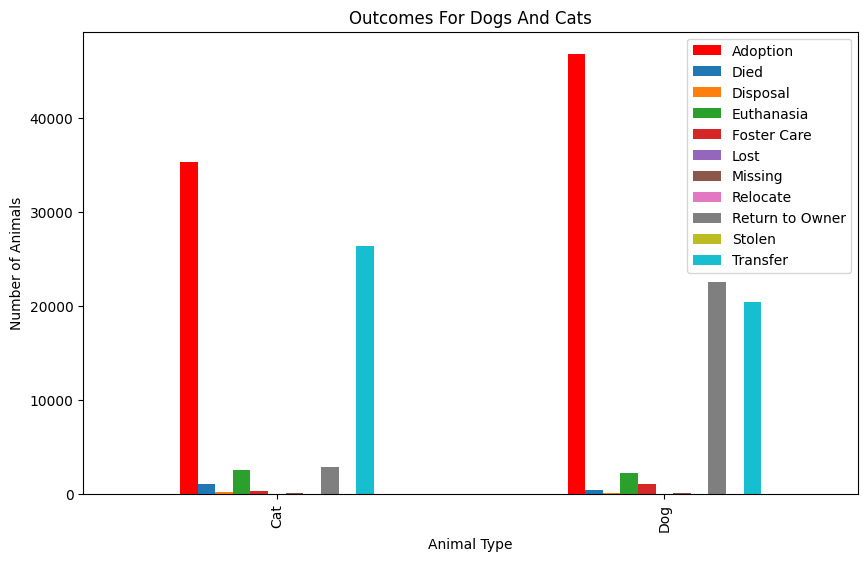

In [52]:
plot_data = dogs_cats.groupby(['animal_type', 'outcome_type'], observed=True).size().unstack()

# Create a dictionary of colors where you specify a different color for the item you want to change
# For example, to make 'Adoption' red while keeping others default colors:
colors = {col: 'red' if col == 'Adoption' else None for col in plot_data.columns}

# Create the bar chart with custom colors
ax = plot_data.plot(kind='bar', figsize=(10, 6), color=colors)

plt.title('Outcomes For Dogs And Cats')
plt.ylabel('Number of Animals')
plt.xlabel('Animal Type')
plt.legend(loc='upper right')
plt.show()

In [53]:
cleaned_shelter.head(1)

,index,animal_id,name,date_time,date_of_birth,outcome_type,animal_type,age_upon_outcome_days,age_upon_outcome_years,sex_upon_outcome,breed,color
0,0,A882831,Hamilton,2023-07-01 18:12:00,2023-03-25,Adoption,Cat,90,0.25,Neutered Male,Domestic Shorthair,Black/White


In [54]:
adopted = cleaned_shelter[cleaned_shelter['outcome_type']=='Adoption']

<ipython-input-55-ee4699520ea8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adopted['day_of_week'] = pd.Categorical(adopted.loc[:,'date_time'].dt.day_name(), categories=day_order, ordered=True)


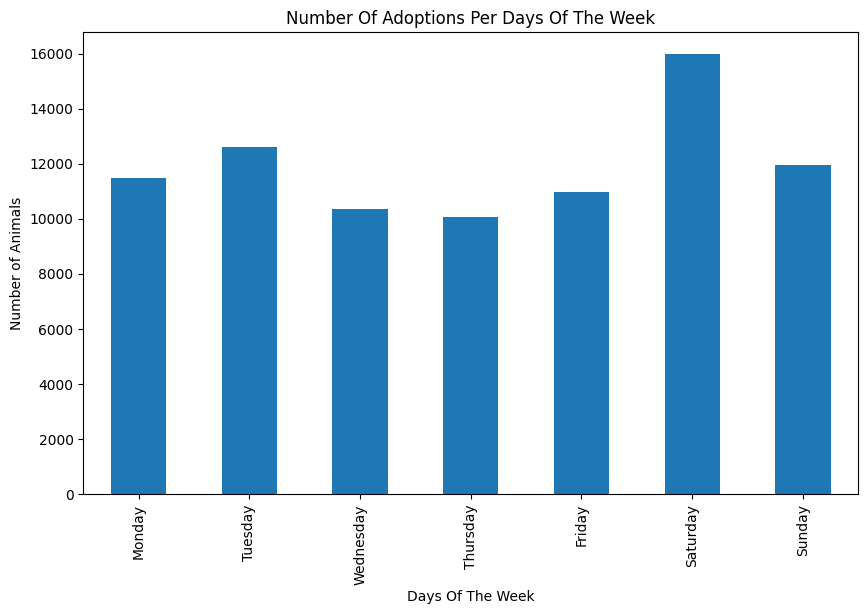

In [55]:

plot_data = adopted.groupby(adopted['date_time'].dt.day_name(), observed=True)['animal_id'].count()

# Defining the desired order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Converting 'date_time' to day names and then to an ordered categorical type
adopted['day_of_week'] = pd.Categorical(adopted.loc[:,'date_time'].dt.day_name(), categories=day_order, ordered=True)

# Group by the ordered categorical day_of_week
plot_data = adopted.groupby('day_of_week', observed=True)['animal_id'].count()

ax = plot_data.plot(kind='bar', figsize=(10, 6))

plt.title('Number Of Adoptions Per Days Of The Week')
plt.ylabel('Number of Animals')
plt.xlabel('Days Of The Week')
plt.show()

### Animals divided by those who made one visit to the shelter vs more than one.

In [56]:
one_time_visitor =cleaned_shelter[~cleaned_shelter['animal_id'].duplicated()]

In [57]:
frequent_visitors = cleaned_shelter[cleaned_shelter['animal_id'].duplicated()]

Number of animals that were seen at the shelter once by animal type.

In [58]:
one_time_visitor.groupby('animal_type', observed=True).size()

,0
animal_type,
Bird,868
Cat,65372
Dog,79196
Livestock,34
Other,8776


In [59]:
one_time_visitor.groupby('outcome_type', observed=True).size()

,0
outcome_type,
Adoption,73693
Died,1626
Disposal,860
Euthanasia,10425
Foster Care,948
Lost,2
Missing,81
Relocate,28
Return to Owner,20287


Number of animals seen more than once at the animal shelter. We can see the highest number were dogs.

In [60]:
frequent_visitors.groupby('animal_type', observed=True).size()

,0
animal_type,
Cat,3038
Dog,14233
Other,39


In [61]:
frequent_visitors.groupby('outcome_type', observed=True).size()

,0
outcome_type,
Adoption,9710
Died,22
Disposal,6
Euthanasia,220
Foster Care,275
Missing,11
Return to Owner,5205
Stolen,1
Transfer,1860
